<a href="https://colab.research.google.com/github/kooll/25t2/blob/main/book/ch03_lines_as_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第3章 データ構造を効果的に活用する

前の章では、コードのパフォーマンスを測定する方法について学びました。この章では、データ構造の選択がコードのパフォーマンスにどのように影響するかを示し、取り組んでいる問題に最適なデータ構造を選ぶ方法について説明します。

データサイエンティストとしてコードを書く際、データを保存するために様々なデータ構造を使用する必要があります。使用するデータ構造については多くの選択肢があり、作業している問題に適したものもあれば、あまり良くない選択もあるでしょう。

...パフォーマントなプログラミングにおいて重要なのは、自分のデータにどんな質問をしようとしているのかを理解し、それらの質問に迅速に答えられるデータ構造を選択することです。

マイケ・ゴレリックとイアン・オズヴァルド、高性能

問題に対して適切なデータ構造を使用することが重要です。その理由は主に二つあります。第一に、そのデータ構造はそのユースケースに最適化されていること、第二に、そのデータ構造には有用なメソッドが関連付けられていることです。したがって、正しいデータ構造を選択すると、コードの性能が向上し、使いやすくなります。また、これによりコードがより予測可能で理解しやすくなることも意味します。

この章では、データサイエンスのコードを書く際によく使われるデータ構造について紹介します。具体的には、Pythonのリスト、タプル、辞書、セット、NumPyの配列、pandasのDataFrameです。それぞれの利点と欠点を説明し、時間とメモリの使用量の観点からどれがより良いパフォーマンスを発揮するかを議論します。また、最適なパフォーマンスを得るために異なるデータ構造をどのようにうまく利用するかについても説明します。

多くの本や記事では、ここで扱わないデータ構造がたくさん紹介されています。例えば、連結リスト、ヒープ、キュー、二分探索木などです。これらは、特にPython以外のプログラミング言語では、ソフトウェアエンジニアリングにおいてより重要な傾向があります。データ構造についてもっと学びたい場合は、私がおすすめします。

『Pythonで学ぶデータ構造とアルゴリズムの基礎』

ジェイ・ウェングロウ著（プラグマティック・ブックスヘルフ）。

## 基本的なPythonデータ構造

このセクションでは、Pythonの4つの基本的なデータ構造であるリスト、タプル、辞書、およびセットについて議論したいと思います。これらはすでにコード内で使用していると思われますが、これらのデータ構造がどのように実装されているか、一般的な操作の時間計算量についての詳細をお伝えします。そのためにビッグO記法を使用します。これにより、これらのデータ構造がどのように素早く動作し、どこで遅くなるかの直感を得ることができます。これは、使用用途に最適なデータ構造を選択する手助けとなり、コードの最適化が必要な場合の焦点を当てるポイントを提供します。

### リスト Lists

リストはPythonの基本的なデータ構造であり、頻繁に目にするでしょう。Pythonのリストは配列の一種で、ある程度の順序を持つデータ構造です。つまり、リストの最初、3番目、または他の任意の要素を参照することができます。

Pythonのリストは動的配列であり、要素が追加されるとサイズを変更できることを意味します。また、異なる種類の要素を格納することもできるため、例えば、リストには文字列と整数の両方が含まれることがあります。

Pythonでは、リストのサイズに応じて連続したメモリ領域が確保され、リストの各要素が次の要素と隣接したメモリ位置に配置されます。これは重要な意味を持ちます：リスト内の要素を簡単に検索できます。Pythonインタプリタはリストの開始位置のメモリ位置を知っているため、たとえばリストの5番目の要素を検索する場合、リストの開始から5番目のメモリ位置にある要素を単純に取得します。

まず、10個の要素を持つリストを作成して、そのリストが成長するにつれて要素を検索するための時間の変化を測定することができます。

In [ ]:
small_list = list(range(10))

その後、%%timeit（第２章で説明）を使用できます。

In [ ]:
%%timeit
last_element = small_list[-1]


34.2 ns ± 1.17 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


リストの最後の要素を検索するのにかかる時間を測定するために:

次に、同じ実験を実行するために10,000個の要素を持つリストを作成します。

In [ ]:
large_list = list(range(10_000))


最後に、最後の要素を見つけるのにかかる時間を測定してください。

In [ ]:
%%timeit
last_element = large_list[-1]

33.2 ns ± 0.589 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


どちらのリストも、時間がかかるのはほぼ同じです。たとえ2番目のリストが最初のリストの1,000倍のサイズであってもです。リストの検索はO(1)（一定時間）です。これはビッグO記法で、以前に説明しました。リストがどれだけ大きくても、その中の要素を検索するのにかかる時間はほぼ同じです。

リストに要素を追加するたびに、メモリ内で余分なスペースを占有します。Pythonは元のリストの長さを超える追加のスペースを確保しますが、このスペースがいっぱいになると、連続するスペースを持つ新しいメモリの場所にリスト全体をコピーする必要があります。リストの末尾に要素を追加する操作はO(1)ですが、余分なスペースがいっぱいになったときにリストをコピーするためのオーバーヘッドがあります。

何かをリストの途中に挿入すると、その新しい要素の後のすべての要素が...

要素は新しいメモリ位置に移動する必要があります。そのため、オペレーショ

挿入はO(n)です。リストの中央から要素を削除するのもO(n)です。挿入と削除の両方がO(n)である理由は、リストが常に連続したメモリ領域に存在している必要があるためです。

特定の長さまでリストに要素を追加することがわかっている場合、これは必ずしも最も効率的な方法ではないかもしれません。より良い方法は、

正しい長さのゼロのリストを使用するか作成して、その値を更新します。項目をリストの先頭に追加したい場合は、

リストの終わりに使用できるデータ構造として、deaue(両端キュー)データ構造があります。

モジュールから。

リスト内の要素を検索する必要がある場合、検索対象の要素をリスト内のすべてのアイテムと比較する必要があります。その比較プロセスにかかる時間やステップ数を測定することができます。

このことがリストの拡大に伴ってどのように変化するかを、前のコード例からのリストを用いて説明します。

まず、10個の要素を含むリストを検索するのにどれくらいの時間がかかるかを測定します。

In [ ]:
%%timeit
4200 in small_list

177 ns ± 47.3 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


次に、10,000個の要素を持つリストに対して同じことを測定することができます。

In [ ]:
%%timeit
4200 in large_list

51.3 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Pythonのリストをこの方法で検索するには、約1,000倍の時間がかかります。リストのこのような検索はO(n)です。リストを検索するより効率的な方法には、O(log n)の2分探索などがあります。しかし、何かが存在するかどうかを頻繁に検索する必要がある場合は、後述するように、辞書やセットを使用する方が良いでしょう。

## タプル Tuples

Pythonのタプルは配列でもありますが、そのサイズは固定されています。タプルは不変であり、一度作成すると変更することはできません。例えば、タプルの末尾に要素を追加することはできません。

タプルは、データ構造に保存したい項目が少数であり、これらの項目を変更しない場合に便利です。注意すべき点の一つとして、タプルはメモリに格納されるのではなく、Pythonのランタイムにキャッシュされるため、リストよりもタプル内の要素を検索する方がさらに高速です。タプル内の要素を検索するのはO(1)です。

## 辞書 Dicitonaries

辞書はPythonにおけるもう一つの基本的なデータ構造であり、キーと値のペアに基づいています。つまり、あるリンクを持つデータ要素のペアが存在することを意味しており、たとえば人の名前とその住所が該当します。辞書は本質的な順序がないデータに最適です。

Pythonの辞書は、内部ではハッシュテーブルによって動作しています。これらはハッシュ関数を使用して、キーをリストのインデックスに変換します。図3-1はこれがどのように機能するかを示しています。この場合、「Heather Hancock」というキーがハッシュ関数によってインデックス3に変換され、これによりこの人物の名前に関連するアドレスを取得できます。

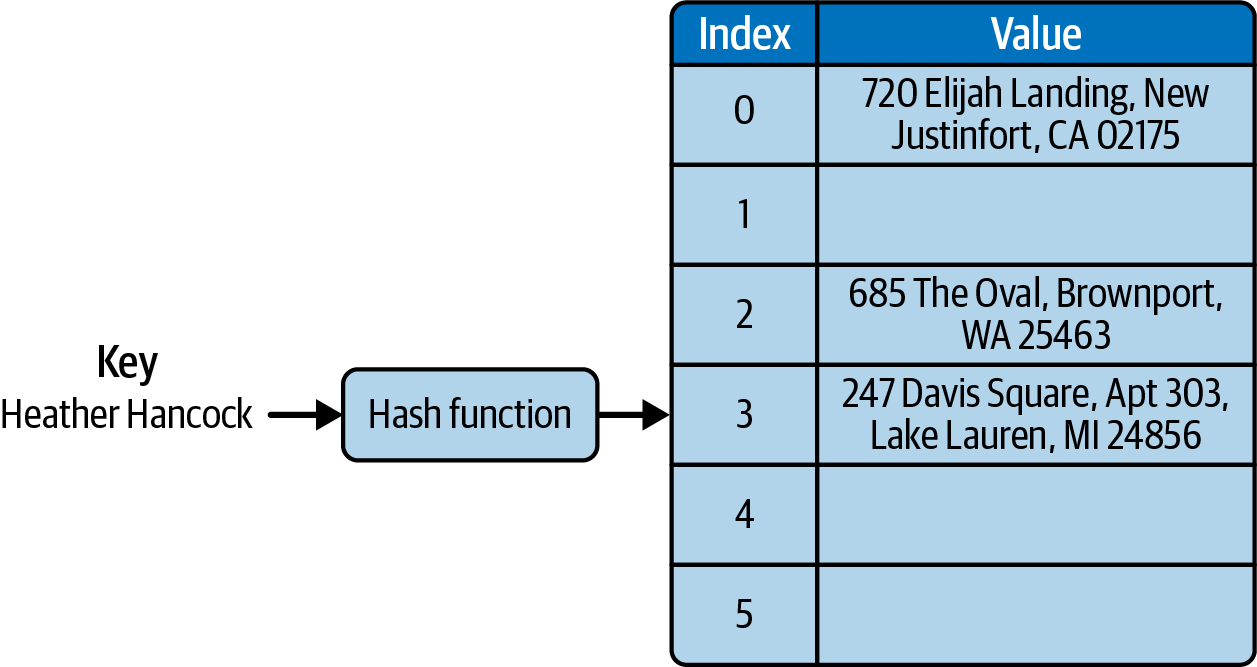

図3-1. ハッシュテーブルを使用した辞書の検索

ハッシュ関数は、文字列や整数などの辞書キーに含まれるものを、値のリスト内の関連するインデックスである整数にマッピングします。ハッシュ関数には多くの異なるタイプがあります。整数の剰余を取ることはシンプルな例です。Pythonの辞書におけるハッシュ関数は、これよりもはるかに複雑です。

ハッシュ関数は、同じキーに適用されたときに毎回同じ整数を返さなければなりません。辞書内のキーもユニークである必要があり、正しい値を返すことが可能でなければなりません。辞書のキーは、文字列、整数、もしくは浮動小数点数のようにハッシュ可能な型である必要があります。Pythonのリストはハッシュできません。

ハッシュテーブルは便利な機能を提供します。辞書内で特定のキーに対応する値を検索する操作はO(1)です。リスト内の要素を検索するのと同じ性能を得ることができますが、リストの順番を知る必要はありません。キーと値のペアの挿入、更新、および削除もすべてO(1)です。アイテムはハッシュテーブルに任意の順序で挿入することができます。

辞書の検索が一定であることを確認するために実験を行うことができます。

Fakerライブラリは非常に便利で、名前や住所、メールアドレスなどの個人情報を含む、現実的に見える偽のデータを作成します。

以下のコマンドを使用して、フェイカーのジェネレーターを初期化し、偽のデータを生成できます。

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.1 MB/s eta 0:00:00


In [ ]:
from faker import Faker

fake = Faker()

それでは、実験を実行するためにこれを使用して辞書を作成します。

In [ ]:
small_dict = {}

for i in range(10):
    small_dict[fake.name()] = fake.address()


In [ ]:
print(small_dict)

{'Wendy Ray': '0221 Reed Valleys\nNorth Melissahaven, NM 48380', 'Nathan Ortiz': '15937 Nancy Tunnel\nNew Jacquelineport, HI 53695', 'Dean Patterson': '671 Lee Isle\nTimothyhaven, DC 65069', 'David Gomez': '53708 Baldwin Plaza Apt. 490\nPort David, NJ 96773', 'Samuel Garcia': 'PSC 7674, Box 1002\nAPO AP 70251', 'Cindy Forbes': '16036 Arthur Stream\nMckinneyshire, ME 35310', 'Dr. Joshua Mccarthy': '27014 Swanson Row Suite 747\nEast Nancy, OH 37240', 'Mrs. Jessica Romero DVM': '47845 Scott Mews\nNew Kyleport, CA 52922', 'Mark Alvarez': '312 Farmer Plains\nWilliamsonview, WI 92916', 'Felicia Rogers': 'Unit 2945 Box 2360\nDPO AA 00764'}


以下の10個のキーと値のペアを持つ小さな辞書における検索時間を測定できます：

In [ ]:
%%timeit
small_dict['Wendy Ray']


40.7 ns ± 0.689 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


10000 個のキーと値のペアをもつ辞書も作れます。

In [ ]:
large_dict = {}

for i in range(10_000):
    large_dict[fake.name()] = fake.address()

In [ ]:
print(large_dict)

{'Elizabeth Spence': '356 Gutierrez Plain\nSarahberg, OH 26911', 'Timothy Romero': '58870 Gabriela Keys\nKeithchester, NY 45037', 'Brandon Fields': '99084 Garcia Corners\nDavidmouth, IN 20722', 'Sean Bailey': '671 Angelica Ports Apt. 403\nEast Jonfurt, NE 57780', 'Tyler Wilkerson': '51201 Kevin Pines\nVickihaven, IL 25580', 'Amy Collier': '042 Cortez Pass Apt. 371\nHannaview, MA 33995', 'Michael Adams': '65389 Laura Glen\nAnthonyview, SC 79654', 'Daniel Simpson': '303 Yates Oval\nJessicamouth, TN 26457', 'Stephen Anderson': '9767 Keith Pike Apt. 951\nWest Kevinbury, VT 30836', 'Kristen Tate': '65986 Harrison Orchard Apt. 458\nAndersontown, MT 59983', 'Chase Davis': '56712 Maldonado Motorway Apt. 438\nJeanettefort, PR 93336', 'Steven Morris': '18499 Avery Well Suite 583\nEast Jamesfurt, MT 59315', 'Bridget Berg': '5484 Michael Trail Apt. 931\nPort Kevinmouth, MO 90511', 'Heather Chang': '56291 Erin Rest\nPort Sheilaborough, KS 96249', 'Tara Moore': '8735 Chelsey Stream Apt. 900\nKingpor

この辞書は以前のものの1000倍の大きさですが、必要なものを探すのにかかる時間はほぼ同じです。辞書で探し物をするのは非常に効率的です。しかし、その欠点はしばしばメモリの使用量が大きいことです。

In [ ]:
%%timeit
large_dict['Timothy Romero']

46.2 ns ± 12.6 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## 集合 Sets

集合は、固有の順序を持たないデータに対して有用なデータ構造です。Pythonでは、集合は辞書と同様にハッシュテーブルを使用して実装されています。

ナリーズ。ただし、キーと値のペアの代わりに、一意のキーのセットのみを持っています。つまり、セット内のすべての要素は一意でなければなりません。

セットは辞書と同様に、要素の追加、削除、更新がすべてO(1)であるという特性を共有しています。セット内の要素を検索することもO(1)です。

リストをセットに変換してからその長さを調べることは、リスト内のユニークな要素の数を数えるための効率的な方法です。

セットの検索は平均して O(1) であり、リストの検索は O(n) になるため、リストをセットに変換してから検索を行う方が効率的かどうかを実験して調べてみましょう。

以前の10,000要素の大きなリストを使用して、リストのルックアップにかかる時間を測定できます：

In [ ]:
%%timeit
4200 in large_list


68.2 µs ± 20.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


次に、そのリストをセットに変換し、ルックアップを実行するのにかかった時間を測定できます。

In [ ]:
%%timeit
large_set = set(large_list)
4200 in large_set


184 µs ± 29.5 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


リストをセットに変換してから検索を行うと、リスト検索に比べて3倍以上の時間がかかります。これは、リストをセットに変換するための時間を要するためです。しかし、一度リストをセットに変換してしまえば、その後の検索は高速です。

In [ ]:
%%timeit
4592 in large_set


47.9 ns ± 1.05 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


セットの検索はリストの検索よりも1,000倍速いです。何度もリスト内のアイテムが存在するか確認したい場合、セットへの変換は素晴らしい選択肢ですが、ほんの少しの回数しかそれを行わないのであれば、それほど価値はありません。この章の他のすべてと同様に、検討する価値がありますが…。

特定の問題に対してどちらが速いかを実験し、測定することです。

辞書やセットの内部構造についてもっと学びたい場合は、お勧めします。

ここで取り上げていない他のネイティブなPythonデータ構造もいくつかあり、使用ケースによっては役立つかもしれません。要素を位置ではなく、割り当てられた名前で検索できるタプルがあります。また、データの保存に最適化されたクラス（について説明します）の一種もあります。

## NumPyArray  (NumPy の配列）

このセクションでは、ネイティブなPythonデータ構造から離れて、NumPyの配列を見ていきたいと思います。NumPyはデータサイエンスで広く使用されるPythonライブラリの1つです。
その理由は、基本のデータ構造
NumPy配列 (ndarray, n-dimentional array, n次元配列）です。

NumPy配列の作成方法や使用方法、またそれを用いて行うすべての操作についての詳細はここでは説明しません。それについては、Wes McKinneyによる「Python for Data Analysis」（O'Reilly, 2021）をお勧めします。この本にはNumPyの使い方についての詳細なリファレンスガイドがあります。

これから NumPy配列が、データサイエンスで人気の理由についての詳しくお伝えします。また、NumPy配列でできることの概要と、いくつかのパフォーマンスに関する考慮点についても見ていきます。

NumPy 配列の機能

NumPy配列はn次元の配列であり、これは使用するのに適切な場面を示す重要な手がかりとなります。
つまり、データが多次元の場合が多くあるからです。
機械学習では、データが行列や二次元配列の構造にある場合に多くあります。
NumPy配列を使用することで、ネイティブのPythonリストと比較してこのデータを扱うのがはるかに簡単になり、多くの機械学習ライブラリはNumPy配列と非常にスムーズに連携します。

ネストされたPythonリストから多次元データ構造を作成することは可能ですが、それに対して計算を行うのはすぐに難しくなります。これを例で説明します。2次元配列があるときに、最初の列の値をどのようにして参照することができるでしょうか？

これをネストされたリストを使って行うためには、全ての行を通過して最初の値を抽出するコードを書かなければなりません。リスト内包表記を使用した一例を以下に示します。

In [ ]:
python_2d_list =[[1, 3, 5], [2, 4, 6], [7, 9, 11]]

first_column = [python_2d_list[i][0] for i in range(len(python_2d_list))]

ただし、NumPy配列を持っている場合、NumPyの配列スライシング構文を使用して、最初の列の値を簡単に参照することができます。

In [ ]:
import numpy as np

np_2d_array = np.array([[1, 3, 5], [2, 4, 6], [7, 9, 11]])

first_column = np_2d_array[:, 0]

リスト内の要素を検索して新しい変数名を選択した場合、それはその要素の新しいコピーを作成します。しかし、NumPy配列で同じ操作を行うと、これは元の配列のビューになります。ビュー内の値を変更すると、元の配列の値も変更されます。

上の例のnp_2d_array オブジェクトを変更すると、対応する first_columnの値も変更されます。

オブジェクト内の値を変更することなくビューを作成する方法です。ビューを作成することは、より高速でメモリ効率が良くなります。

コピーを作成するよりも効率的であり、これがNumPy配列がリストよりも優れたパフォーマンスを提供するもう一つの理由です。

同様に、多次元データに対する他の多くの操作も、ネストされたリストよりもNumPy配列を使用する方がはるかに簡単です。これには、行列の積、配列の結合、配列の転置、配列の形状変更などが含まれます。

しかし、NumPy配列に関する注意すべき点の一つ（次のセクションでさらに詳しく述べます）は、配列が一種類のデータ型しか含むことができないという点です。そのため、データが混合型（例えば、データ構造に文字列と整数の両方を含める必要がある場合）の場合、NumPy配列は適切な選択ではありません。

## NumPy配列のパフォーマンスに関する考慮事項

前のセクションで述べたように、NumPy配列は単一のデータ型のみを許可します。これは制限のように見えるかもしれませんが、実際には大きな性能向上の利点があります。これは、以下のコードが有効な選択肢であるPythonのリストとは対照的です:

In [ ]:
mixed_type_list = ["one", 2, 3.14]

Pythonのリストは、同じデータ構造内に文字列、整数、浮動小数点数を含むことができます。同じデータを保存するためにNumPy配列を作成してみることもできます。例えば、以下のようにします。

In [ ]:
mixed_type_array = np.array(["one", 2, 3.14])

このコード行はエラーなしで実行されます。しかし、この配列を見てみると、すべての要素が文字列に変換されていることがわかります。

In [ ]:
print(mixed_type_array)

['one' '2' '3.14']


NumPyはすべての要素を同じ型に変換しました。NumPy配列内の要素の型は配列と共に保存されており、それは以下の方法で確認できます。

In [ ]:
integer_array = np.array([1, 2, 3])

print(integer_array.dtype)

int64


NumPyは、Python の標準のintではなく、int64を使用します。

標準のデータ型とは異なる型であることが、性能向上につながることもあります。この点については、このセクションの後半で説明します。

NumPy配列のすべての要素が同じ型であることが、特に「ベクトル化」として知られる処理において大きなパフォーマンス向上をもたらします。

こちらは、NumPy配列を使用することでPythonリストに比べて得られるパフォーマンス向上の例です。まず、NumPyを使用して100,000個のランダムな整数からなる配列を生成し、それを通常のPythonリストに変換します。

In [ ]:
random_int_array = np.random.randint(1, 100_000, 100_000)
random_int_list = list(random_int_array)

次に、通常のPythonのsum()を使用してリストを合計することができます。そして、使用してください。

In [ ]:
%%timeit -r 7 -n 100
sum(random_int_list)


4.32 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


次に、ベクトル化された操作である np.sum() を使用して同じ操作を実行し、再度その所要時間を計測します。

In [ ]:
%%timeit -r 7 -n 100
np.sum(random_int_array)


31 µs ± 9.36 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


それは約100倍速くなります！ これは非常に大きなパフォーマンス向上です。実行したい操作がベクトル化されたNumPyのメソッドとして利用可能であれば、ネイティブのPythonメソッドや自作のコードを書くのではなく、絶対にそれを使用するべきです。操作が利用可能かどうか確認することができます。

NumPy配列を使用する際には、後で配列に要素を追加する必要があるかどうかを考慮する必要があります。通常のPythonリストとは異なり、NumPyが配列のためにメモリを割り当てるとき、追加の余裕はありません。そのため、NumPy配列に要素を追加すると、その都度配列全体を新しいメモリ位置に移動する必要があります。これにより、NumPy配列への追加はO(n)となります。したがって、初めから正しい容量で配列を初期化することが重要です。そして、その簡単な方法としてnp.zerosを使用することができます。例えば、次のようにします：

In [ ]:
array_to_fill = np.zeros(1000)

その後、配列に要素を追加するのではなく、ゼロを新しい要素で置き換えることができます。

NumPyのさまざまな型を利用することで、NumPy配列を使ってメモリスペースを大幅に節約することもできます。NumPy配列はメモリにロードされるため、大きな配列を扱う場合にはそのサイズを小さくすることが役立ちます。

以前と同様にランダムな整数の配列を生成できます。

In [ ]:
random_int_array = np.random.randint(1, 100_000, 100_000)

属性を調べることで、これが占有するバイト数を確認できます。

In [ ]:
random_int_array.nbytes

800000

この配列は800,000バイトのスペースを占有しています。

属性からタイプを見つけることができます。

In [ ]:
random_int_array.dtype

dtype('int64')

この場合、int64です。これは64ビットの整数で、許可される範囲は-9,223,372,036,854,775,808から9,223,372,036,854,775,808までです。

この範囲全体の整数が必要でない場合は、配列を32ビット整数型に変換することができます。32ビット整数型の許容範囲は次の通りです。

-2,147,483,648から2,147,483,648まで。また、データ範囲が十分に小さい場合は16ビット整数を使用することもできます。

配列を変換するには、次のメソッドを使用できます。

In [ ]:
random_int_array_32 = random_int_array.astype(np.int32)

バイト数を調べると、スペースが半分で済むことがわかります。

In [ ]:
random_int_array_32.nbytes

400000

NumPy 配列を作る際に、dtype を指定すれば、最初からスペースを小さくすることができます。

In [ ]:
small_array = np.array([1, 3, 5], dtype=np.int16)

In [ ]:
small_array.nbytes

6

## Daskを使用した配列操作

前のセクションで紹介したNumPy配列を使ったコードのパフォーマンス向上のための戦略を試してみても、まださらに最適化が必要な場合、このライブラリは素晴らしい選択肢です。それは配列操作を並行して実行することができ、計算を速くし、コンピュータのメモリに収まらないデータにも対応します。Daskは標準のNumPy配列に非常に似たインターフェースを提供しますが、少しだけ複雑さが加わります。そのため、パフォーマンス向上が必要な場合にのみ使用する価値があります。これにより、ノートパソコンや分散システム（クラスター）で複数のコアを使って同時に計算を実行することができます。

Daskは、配列をチャンクに分割し、一度に1つまたは複数のチャンクで計算を実行し、その結果を組み合わせることで動作します。例えば、非常に大きな配列の最大値を見つけたい場合、その配列をいくつかのチャンクに分割し、各チャンクの最大値を求めてから、それらの結果を組み合わせて全体の最大値を求めることができます。このように並列化できる操作はすべてではありませんが、もしその問題に適用できる場合は、コードをより効率的にすることができます。

Daskは、システムのメモリよりも大きなデータに対して計算を実行することも可能です。全てのチャンクが一度にロードおよび評価されるわけではないため、配列全体をメモリにロードする必要はありません。それぞれのチャンクを順次評価することができます。

以下のコマンドでDaskをインストールできます:

In [ ]:
!pip install dask[complete]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.3 MB/s eta 0:00:00


NumPyとDaskを使用して同じ操作を実行し、かかる時間を比較することができます。

1つの実験として、大きな配列の最大値を見つけることができます。`np.random.randint()`を使用してランダムな整数で埋められたNumPy配列を作成できます。以下のコードは、10億個の整数を持つ配列を作成します：

In [ ]:
import numpy as np
#large_np_array = np.random.randint(1, 100000, 1_000_000_000)
large_np_array = np.random.randint(1, 100000, 1_000_000_00)


 (訳注)
 Google Colab で10億個の整数を扱うのは、無料枠ではできないので、10分の1、1億個の整数にしています。


この計算を標準的なNumPy配列で行うのにかかる時間を測定することができます。

In [ ]:
%%timeit -r 1 -n 7
np.max(large_np_array)

96.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 7 loops each)


Dask配列は、NumPy配列とは異なるデータ構造です。Daskには多くのNumPyメソッドが再現されているため、以下のコードでランダムな整数のDask配列を作成することができます。

In [ ]:
import dask.array as da
#large_dask_array = da.random.randint(1, 100_000, 1_000_000_000)
large_dask_array = da.random.randint(1, 100_000, 1_000_000_00)

NumPy配列からDask配列を作成することもできます。このように行います：

In [ ]:
large_dask_array = da.from_array(large_np_array)

Daskを使用するときには、NumPyと比べて追加のステップがあります。まず、操作を初期化する必要があります。この場合、.max() メソッドを使用します。その後、.compute() メソッドを使って計算を実行する必要があります。このステップの処理時間を計測することで、NumPy配列と比較することができます。

In [ ]:
%%timeit -r 1 -n 7
array_max = large_dask_array.max()
array_max.compute()

98 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 7 loops each)


Dask配列での最大値の検索は、NumPy配列よりも約20倍高速です！

（訳注）
10分の1の個数のデータでは、NumPy もDaskも同じ程度の実行時間になります。

Daskは、分散処理を別のコアやマシンで行うことができます。
Daskは処理の「タスク」のスケジュールもします。次のコードがその例です。

（訳注）が、Google Colab ではエラーになります。後日、自分のPCで試しましょう。

```python
from dask.distributed import Client

client = Client(n_workers=4)
client
````


図3-2は、ノートパソコン上の全てのコアを使用する準備が整ったローカルクライアントを示しています。

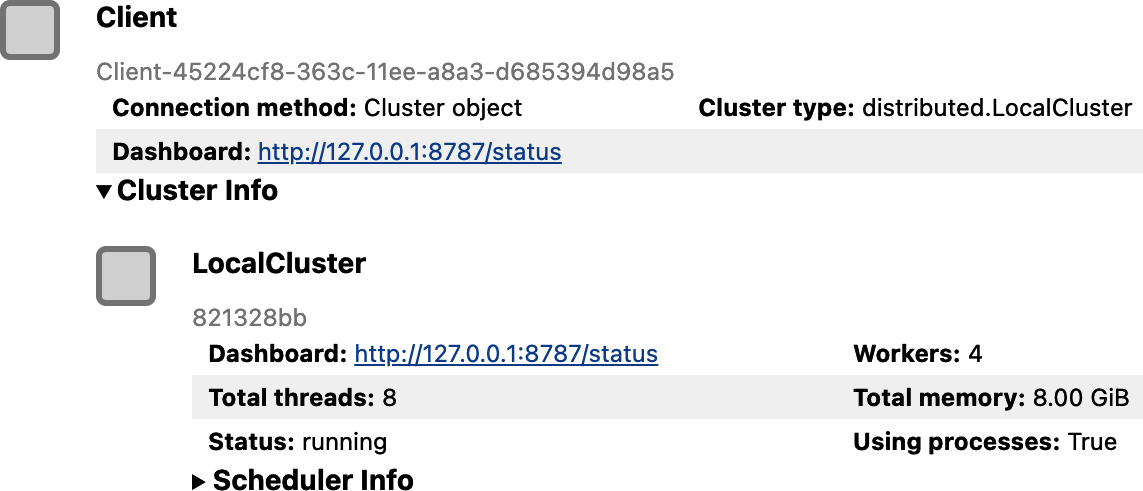

図3-2. Daskローカルクラスターのダッシュボード

このクライアントの準備ができたら、上記のようにDask配列を使用することができ、計算は指定した数のワーカーに分散されます。

Daskについてもっと知りたい場合は、いくつかの優れた例を参照してください。

## 機械学習における配列 (省略予定）

配列の乗算は、多くの機械学習アルゴリズムの重要な部分を占めています。ML（機械学習）のデータは、カテゴリデータ、画像データ、テキストデータなど、しばしば行列（二次元配列）やテンソル（高次元配列）として保存されます。MLモデルが大規模化するにつれ、配列操作をより効率的にし、モデルのトレーニングを迅速化するための多くの努力がなされてきました。

MLモデルのための2つの最も人気のあるトレーニングフレームワークであるTensorFlowとPyTorchは、GPUでのトレーニングによるスピードアップを活用した最適化されたデータ構造を提供しています。これらのフレームワークのいずれにもNumPy配列を簡単に変換できます。

In [ ]:
np_tensor = np.random.rand(4,4)

それを次のようにTensorFlow形式に変換してください。

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

tf_tensor = tf.convert_to_tensor(tensor_numpy)

NameError: name 'tensor_numpy' is not defined

またはPyTorch形式に変換：

In [ ]:
import torch

pytorch_tensor = torch.from_numpy(np_tensor)

INFO:distributed.core:Event loop was unresponsive in Nanny for 3.40s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 3.43s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.17s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Nanny for 3.18s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeout

MLのデータ構造は、GPU向けに最適化されています。これは、GPUが多くのテンソル演算を並行して実行できるためです。多くのMLアルゴリズムは並列化が非常に容易であり、ニューラルネットワークの逆伝播もその一例です。

また、スパース行列についても触れておきたいと思います。これらは、ゼロが大半を占める行列を格納するためのメモリ効率が良いデータ構造です。これが役立つ一般的な例としては、テキストデータ内の異なる単語の出現頻度をカウントすることが挙げられます。テキストの任意のブロックに対して使用する語彙が大きい場合、ほとんどの特徴量がゼロになります。scikit-learnでは、

SciPyの疎行列を使用します。これをNumPy配列に変換したり、その逆を行ったりすることができますが、疎行列の方がメモリ効率がはるかに良いです。

機械学習モデルのトレーニングを最適化することは非常に大きなテーマであり、ここでは詳しく説明しません。これに取り組み始めたい場合、どちらもトレーニングコードでボトルネックを特定するためのプロファイラーを提供しています。

## pandasデータフレーム

pandasは、Pythonでデータサイエンスを行うための最も人気のあるライブラリの1つです。データの操作と分析のための重要なライブラリです。pandasは、遅くてメモリを多く消費するという評判がありますが、このセクションでは、その性能を向上させるためのさまざまな方法を紹介します。

pandasは元々NumPyの上に構築されており、これを扱う際にはこの点を覚えておくことが重要です。NumPy配列に適用される多くの原則は、pandasのDataFrameにも適用されますが、pandasに特有の機能もあります。2023年4月にリリースされたpandas 2.0では、バックエンドとしてデータ構造を使用するオプションが追加されました。

NumPy配列の場合と同様に、pandasのDataFrameに関連するすべての関数を取り上げるわけではありません。詳細については、Wes McKinneyによる『Python for Data Analysis』（オライリー、2021年）を再びお勧めします。

データフレーム機能

pandasには2つの重要なデータ構造があります：DataFrameとSeriesです。DataFrameは1つ以上のSeriesから構成されています。Seriesは1次元のNumPy配列に似ていますが、インデックスが追加されている点が重要です。これにより、Series内の項目をインデックスやその位置で検索することができます。

シリーズを作成するには、次のようにします：

これは、年をインデックスとする次のような構造を提供します。

NumPyの配列と同様に、Seriesも連続したメモリブロックとして作成されます。つまり、いくつかの同じパフォーマンスに関する考慮事項が適用されます。たとえば、Seriesの末尾に新しいアイテムを追加するのは遅いです。これは、構造全体を新しいメモリ位置に移動しなければならないからです。パフォーマンスに関する考慮事項については、次のセクションで詳しく説明します。

Pandas DataFrameは、2次元のPandas Series構造の配列であり、列インデックスも持ちます。Pandas Seriesから次のようにして構築することができます。

これは次のようなDataFrameを提供します。

NumPy配列とは異なり、DataFrame内の各列は異なるデータ型にすることができます。

pandasには、データを混在させることができるカラムタイプも用意されています。

シリーズ内で異なるタイプのデータを扱うことができます。pandasには、NumPyよりも多くの欠損データを処理するための関数があります。

pandasのデータ構造は、行と列の情報を持つ2次元の表形式のデータに特に有用です。また、スプレッドシート形式のデータにも最適です。データベースのテーブルと同様に使用することもでき、データの結合やクエリを行うオプションを提供しますが、これはプロジェクトが小さすぎて本格的なデータベースを設定する価値がない場合に最適です。さらにpandasは、時系列データを扱うための多くの特殊な関数も提供しています。

データフレームのパフォーマンス考慮事項

NumPyと同様に、pandasライブラリには、配列のすべての要素に対して一度に計算を行う多くのベクトル化操作があります。これらの多くは内部でNumPyを使用しています。ベクトル化された操作が利用可能な場合、それを使用することでほぼ間違いなく最高のパフォーマンスを得ることができます。

たとえば、算術演算はベクトル化されています。

NumPyで利用できるベクトル化された操作に加えて、pandasには、lower、strip、splitなどが含まれています。通常のPythonの.lower()メソッドを使用するよりも、df['column_name'].str.lower()を使用する方が高速です。

試していることが組み込み関数として利用できない場合は、あなた自身で関数を作成したり、外部ライブラリを使って実装することができます。

任意の関数を定義するとき（詳細については

次に

章）。以下のように、計算に若干のオーバーヘッドが追加されます：

データフレームの各行に対して何らかの操作を実行したい場合、すべての行を反復処理するのが直感的に見えるかもしれません。そして、PandasはPythonの他の多くのループ方法に比べて効率的ですが、大規模なデータセットでは依然として非効率的になる可能性があります。このため、ベクトル化された操作や適用可能なメソッドの使用が推奨されることがよくあります。

が、この方法を示しています。しかし、以下のように、これは

ベクトル化された操作やapply関数を使用するよりもはるかに遅いため、避けるべきです。

デフォルトでは、pandasのDataFrameはメモリに読み込まれます。そのため、もしDataFrameがコンピュータのメモリよりも大きければ、問題が発生します。

データ処理がどれくらいメモリを消費するかを見積もるのも難しいため、たとえDataFrameがコンピュータのメモリより小さくても問題が発生する可能性があります。pandasのメモリ管理は急速に改善されていますが、DataFrameがコンピュータのメモリより大きい場合にできる基本的なことがいくつかあります。まず、作業したいカラムだけを読み込むことができます。たとえば、指定することで…

CSVファイルで読み込みたい列は、`read_csv`関数を使用して指定できます。次に、あなたは

議論を作るための議論

特定の行のサブセットだけを扱うことができるイテレーターです。pandasのオプションのバックエンドとしてPyArrowが最近導入されたことで、サポートも提供されます。

より大きなデータ量の別の選択肢として、Daskライブラリを使用することができます。NumPyの場合と同様に、データがメモリに収まりきらないほど大きい場合、Daskはそれを分割することができます。また、データ処理が遅く、複数のコアやマシンで並列化したい場合にも優れた選択肢です。Daskには独自のデータ構造があり、データから直接、または既存のpandas DataFrameから作成することができます。

あなたも、パフォーマンス向上のためにDataFramesを使用するライブラリへの切り替えを検討することができます。これはpandasよりも成熟していないプロジェクトですが、より高速でメモリ効率が高いです。基礎となるコードはRustで書かれており、Apache Arrowを使用していますが、インターフェースはpandasに非常に似ています。

主なポイント

この章では、さまざまなユースケースに対してデータ構造を効果的に使用する方法を見てきました。これらのデータ構造から得られる期待されるパフォーマンスを考えることに加えて、実際に書いているコードでそのパフォーマンスを測定し、異なるオプションを試してみて、自分が取り組んでいる問題に最適な方法を見つけることが重要です。

多くの場合、Pythonの組み込みデータ構造だけで問題を解決することができます。リストは、インデックスによって項目を検索する必要がある場合に効率的な選択肢ですが、リスト内で項目を検索するのは比較的遅いです。辞書はキーを使用した頻繁な検索に適しており、セットは項目が存在するかどうかを確認する効率的な方法となることがあります。

NumPy配列は多次元データに最適です。これらの配列は1種類のデータのみを含んでいるため、NumPyはベクトル化された演算のために高速なコンパイル済みCコードに直接アクセスできます。これにより非常に高速化されるので、もしあなたが行いたい計算に対してベクトル化されたメソッドが利用可能なら、ぜひそれを使用してください。

また、NumPyの型を活用してメモリの使用量を削減したり、Daskを使用して大規模なメモリアレイや並列計算を行うことができます。機械学習プロジェクトでは、GPUに最適化されたデータ構造を使用することが有利である場合があり、疎行列も役立ちます。

pandasのDataFrameは、表形式のデータや基本的なデータ分析に最適です。NumPy配列と同様のパフォーマンス上の考慮事項があり、利用可能な場合は常にベクトル化された操作を使用すべきです。DataFrameの行をイテレーションするのは非常に非効率です。標準的なpandasよりも効率的なパフォーマンスが必要な場合は、DaskライブラリやPolarsライブラリを検討してみてください。

この章の概念についてさらに学びたい場合は、これらのリソースをお勧めします。

アレックス・マルテッリ、アンナ・マルテッリ・レイヴンズクロフト、スティーブ・ホールデン、ポール・マグワイアによる「Python in a Nutshell」（オライリー、2023）は、Pythonのデータ構造に関する優れた概要を提供します。

NumPy配列やpandasのDataFrameに関する詳細は、Wes McKinney著の『Python for Data Analysis』（オライリー、2021年）を参照してください。

より詳細なPythonのパフォーマンス最適化については、『High Performance Python』ミハ・ゴレリックとイアン・オズヴァルド著（オライリー、2020年）をご参照ください。

「Scaling Python with Dask」著者はホールデン・カロウとミカ・キミンズ（オライリー 2023年）は、Daskをデータサイエンスに活用する方法について詳しく解説しています。データサイエンスに関する記事もぜひご確認ください。